In [8]:
%matplotlib inline
%pylab inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import copy


import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))  # so we can import ../exptdata
import exptdata
print('Available exptdata keys: ', [k for k in exptdata.exptdict.keys()])

Populating the interactive namespace from numpy and matplotlib
Available exptdata keys:  ['1deg_c1', '025deg_c1', '01deg_c1', '1deg_c2', '025deg_c2', '01deg_c2', '1deg_c3', '025deg_c3', '01deg_c3']


/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['copy']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [9]:
figdir = ''
def savefigure(fname):
    plt.savefig(os.path.join(figdir, fname+'.png'),dpi=300, bbox_inches="tight", facecolor = 'w')  # comment out to disable saving
#     plt.savefig(os.path.join(figdir, fname+'.pdf'),dpi=300, bbox_inches="tight")  # comment out to disable saving
    return

In [3]:
def time_series_2():
    plt.figure(figsize(12,8))
    
    t1 = []
    t2 = []
    
    for tt in range (1,183,1):
        t1.append(tt)

    for tt in range (1,183,10):
        t2.append(tt)
        
    plt.plot(t1,x1, 'r',label = 'IR value 1deg')
    plt.plot(t1,y1, 'r--',label ='Transport 1deg')
    plt.plot(t1,x2, 'b',label = 'IR value 025deg')
    plt.plot(t1,y2, 'b--',label ='Transport 025deg')
    plt.plot(t1,x3, 'g',label = 'IR value 01deg')
    plt.plot(t1,y3, 'g--',label ='Transport 01deg')
    plt.legend(loc = 'upper right')
    
                        
    plt.xticks(t2)
    plt.title('Time series of 2-year averaged IR value and Tasman Sea transport')
    plt.xlabel('every 2-year')
    plt.ylabel('(Sv)')
    # plt.ylim([-15,-4])
    # plt.ylim([-15,6])
    
    savefigure('time series of Tasman Sea transport and IR value')


In [8]:
def regression(i):
    
    x1 = X[:,3*i-3]
    x2 = X[:,3*i-2]
    x3 = X[:,3*i-1]
    y1 = Y[:,3*i-3]
    y2 = Y[:,3*i-2]
    y3 = Y[:,3*i-1]
    
    # Splitting the dataset into the Training set and Test set
    from sklearn.model_selection import train_test_split
    X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size = 1/3, random_state = 0)
    X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size = 1/3, random_state = 0)
    X_train3, X_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size = 1/3, random_state = 0)
        
    X_train1 = np.array(X_train1).reshape((-1, 1))
    y_train1 = np.array(y_train1).reshape((-1, 1))
    X_test1 = np.array(X_test1).reshape((-1, 1))
    X_train2 = np.array(X_train2).reshape((-1, 1))
    y_train2 = np.array(y_train2).reshape((-1, 1))
    X_test2 = np.array(X_test2).reshape((-1, 1))
    X_train3 = np.array(X_train3).reshape((-1, 1))
    y_train3 = np.array(y_train3).reshape((-1, 1))
    X_test3 = np.array(X_test3).reshape((-1, 1))

    # Fitting Simple Linear Regression to the Training Set
    from sklearn.linear_model import LinearRegression
    regressor1 = LinearRegression()
    regressor1.fit(X_train1, y_train1)
    print('intercept' + str(3*i-2) + ':', regressor1.intercept_)
    print('slope' + str(3*i-2) + ':', regressor1.coef_)
    regressor2 = LinearRegression()
    regressor2.fit(X_train2, y_train2)
    print('intercept' + str(3*i-1) + ':', regressor2.intercept_)
    print('slope' + str(3*i-1) + ':', regressor2.coef_)
    regressor3 = LinearRegression()
    regressor3.fit(X_train3, y_train3)
    print('intercept' + str(3*i) + ':', regressor3.intercept_)
    print('slope' + str(3*i) + ':', regressor3.coef_)
   

    # Predicting the Test set results
    # y_pred = regressor.predict(X_test)

    # Visualising the Training set results
    plt.figure(figsize(12,8))
    plt.scatter(X_train1, y_train1, label = '1deg_c'+str(i))
    plt.plot(X_train1, regressor1.predict(X_train1), label = '1deg_c'+str(i))
    plt.scatter(X_train2, y_train2, label = '025deg_c'+str(i))
    plt.plot(X_train2, regressor2.predict(X_train2), label = '025deg_c'+str(i))
    plt.scatter(X_train3, y_train3, label = '01deg_c'+str(i))
    plt.plot(X_train3, regressor3.predict(X_train3), label = '01deg_c'+str(i))
    plt.title('Transport VS IR value (training set)')
    plt.xlabel('IR value')
    plt.ylabel('Tasman Sea transport')
    plt.legend(loc = 'upper right')

    # Visualising the Test set results
    plt.figure(figsize(12,8))
    plt.scatter(X_test1, y_test1, label = '1deg_c'+str(i))
    plt.plot(X_train1, regressor1.predict(X_train1), label = '1deg_c'+str(i))
    plt.scatter(X_test2, y_test2, label = '025deg_c'+str(i))
    plt.plot(X_train2, regressor2.predict(X_train2), label = '025deg_c'+str(i))
    plt.scatter(X_test3, y_test3, label = '01deg_c'+str(i))
    plt.plot(X_train3, regressor3.predict(X_train3), label = '01deg_c'+str(i))
    plt.title('Transport VS IR value (test set)')
    plt.xlabel('IR value')
    plt.ylabel('Tasman Sea transport')
    plt.legend(loc = 'upper right')

## load data

### Tasman Sea

In [22]:
dataset1 = pd.read_csv('3.2 IR_value/IR_Aus-NZ(1).csv')
dataset2 = pd.read_csv('3.1 Total upper ocean trans/Transport_Tasman Sea(1).csv')

X1 = dataset1.iloc[:, 1].values
X2 = dataset1.iloc[:, 2].values
X3 = dataset1.iloc[:, 3].values
Y1 = dataset2.iloc[:, 1].values
Y2 = dataset2.iloc[:, 2].values
Y3 = dataset2.iloc[:, 3].values

w = 1

x1 = np.convolve(X1, np.ones(w), 'valid') / w
x2 = np.convolve(X2, np.ones(w), 'valid') / w
x3 = np.convolve(X3, np.ones(w), 'valid') / w
y1 = np.convolve(Y1, np.ones(w), 'valid') / w
y2 = np.convolve(Y2, np.ones(w), 'valid') / w
y3 = np.convolve(Y3, np.ones(w), 'valid') / w

### 1-year averaged

In [23]:
def time_series_1():
    plt.figure(figsize(12,8))
    
    t1 = []
    t2 = []
    
    for tt in range (1,184,1):
        t1.append(tt)

    for tt in range (1,184,10):
        t2.append(tt)
        
    
    plt.hlines(0,1,183,color="k")
    plt.vlines(61,-20,10,color="k")
    plt.vlines(122,-20,10,color="k")
    plt.plot(t1,y1, 'r',label ='Transport 1deg')
    plt.plot(t1,y2, 'b',label ='Transport 025deg')
    plt.plot(t1,y3, 'g',label ='Transport 01deg')
    plt.plot(t1,x3, color = 'orange', linestyle = '--',label = 'IR value 01deg')
    
    plt.legend(loc = 'upper right')
    
                        
    plt.xticks(t2)
    plt.title('Time series of 1-year averaged IR value and Tasman Sea transport')
    plt.xlabel('year')
    plt.ylabel('(Sv)')
    plt.ylim([-22,12])
    
    savefigure('1')

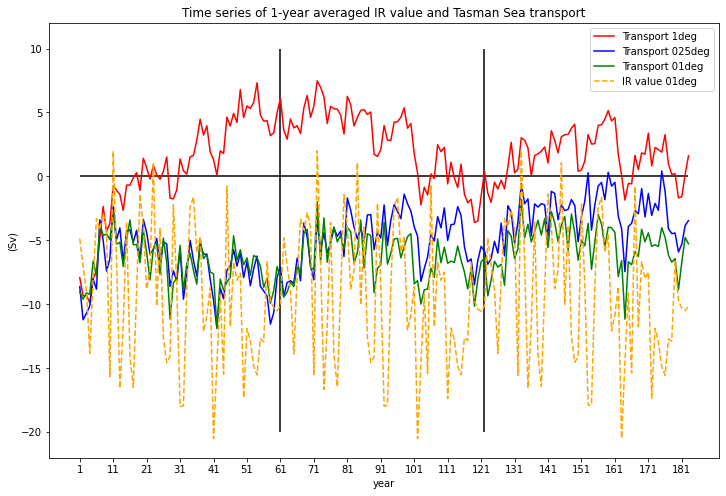

In [24]:
time_series_1()

In [28]:
def time_series_1_1deg():
    plt.figure(figsize(12,8))
    
    t1 = []
    t2 = []
    t3 = []
    
    for tt in range (1,184,1):
        t1.append(tt)
        
    for tt in range (1,184,10):
        t2.append(tt)
        
    
    plt.plot(t1,x1, 'r--',label = 'IR value 1deg')
    plt.plot(t1,y1, 'k',label ='Transport 1deg')
    plt.legend(loc = 'upper right')
    
                        
    plt.xticks(t2)
    plt.title('Time series of 1-year averaged IR value and Tasman Sea transport')
    plt.xlabel('every 1-year')
    plt.ylabel('(Sv)')
    # plt.ylim([-15,-4])
    # plt.ylim([-15,6])
    
    savefigure('time series of Tasman Sea transport and IR value_1deg')

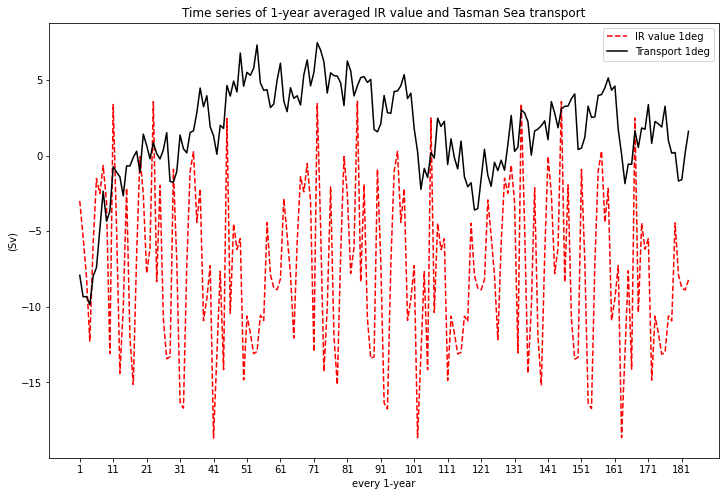

In [29]:
time_series_1_1deg()

In [38]:
def time_series_1_025deg():
    plt.figure(figsize(12,8))
    
    t1 = []
    t2 = []
    t3 = []
    
    for tt in range (1,184,1):
        t1.append(tt)
        
    for tt in range (1,184,10):
        t2.append(tt)
        

    plt.plot(t1,x2, 'b--',label = 'IR value 025deg')
    plt.plot(t1,y2, 'k',label ='Transport 025deg')

    plt.legend(loc = 'upper right')
    
                        
    plt.xticks(t2)
    plt.title('Time series of 1-year averaged IR value and Tasman Sea transport')
    plt.xlabel('every 1-year')
    plt.ylabel('(Sv)')
    # plt.ylim([-15,-4])
    # plt.ylim([-15,6])
    
    savefigure('time series of Tasman Sea transport and IR value_025deg')

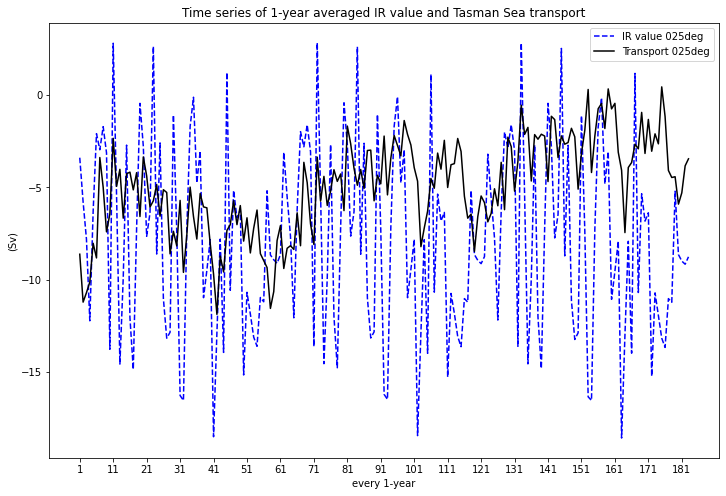

In [39]:
time_series_1_025deg()

In [36]:
def time_series_1_01deg():
    plt.figure(figsize(12,8))
    
    t1 = []
    t2 = []
    t3 = []
    
    for tt in range (1,184,1):
        t1.append(tt)
        
    for tt in range (1,184,10):
        t2.append(tt)
        
    

    plt.plot(t1,x3, 'g--',label = 'IR value 01deg')
    plt.plot(t1,y3, 'k',label ='Transport 01deg')
    
    plt.legend(loc = 'upper right')
    
                        
    plt.xticks(t2)
    plt.title('Time series of 1-year averaged IR value and Tasman Sea transport')
    plt.xlabel('every 1-year')
    plt.ylabel('(Sv)')
    # plt.ylim([-15,-4])
    # plt.ylim([-15,6])
    
    savefigure('time series of Tasman Sea transport and IR value_01deg')

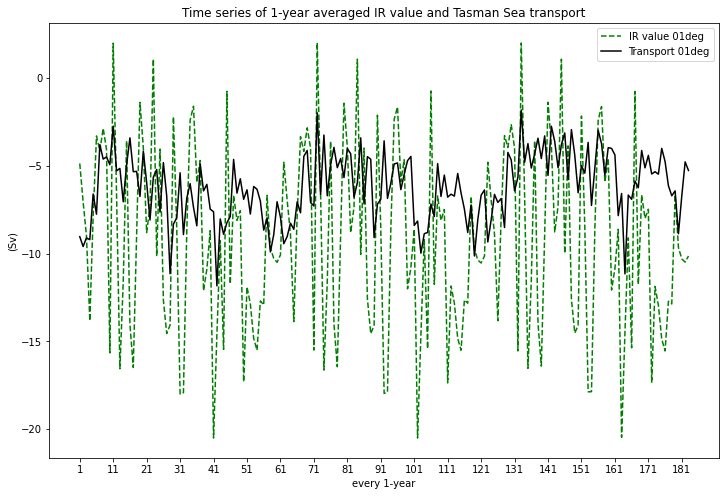

In [37]:
time_series_1_01deg()

### 10-year averaged

In [20]:
def time_series_10():
    plt.figure(figsize(12,8))
    
    t1 = []
    t2 = []
    
    for tt in range (1,175,1):
        t1.append(tt)

    for tt in range (1,175,10):
        t2.append(tt)
        
    
    plt.hlines(0,1,174,color="k")
    plt.vlines(61,-20,10,color="k")
    plt.vlines(122,-20,10,color="k")
    plt.plot(t1,y1, 'r',label ='Transport 1deg')
    plt.plot(t1,y2, 'b',label ='Transport 025deg')
    plt.plot(t1,y3, 'g',label ='Transport 01deg')
    plt.plot(t1,x3, color = 'orange', linestyle = '--',label = 'IR value 01deg')
    
    plt.legend(loc = 'upper right')
    
                        
    plt.xticks(t2)
    plt.title('Time series of 10-year averaged IR value and Tasman Sea transport')
    plt.xlabel('year')
    plt.ylabel('(Sv)')
    plt.ylim([-22,12])

    
    savefigure('2')

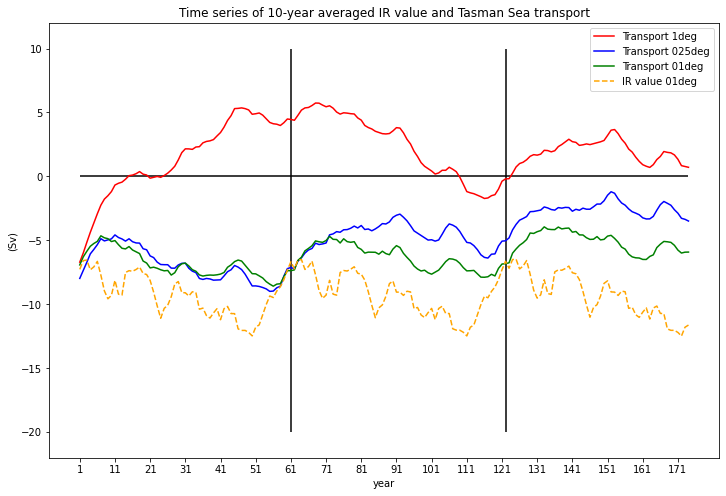

In [21]:
time_series_10()

In [8]:
def time_series_10_1deg():
    plt.figure(figsize(12,8))
    
    t1 = []
    t2 = []
    t3 = []
    
    for tt in range (1,175,1):
        t1.append(tt)
    
    for tt in range (1,175,1):
        tt = tt + 13
        t3.append(tt)
        
    for tt in range (1,175,10):
        t2.append(tt)
        
    plt.plot(t3,x1, 'r--',label = 'IR value 1deg')
    plt.plot(t1,y1, 'k',label ='Transport 1deg')
    plt.legend(loc = 'upper right')
    
                        
    plt.xticks(t2)
    plt.title('Time series of 10-year averaged IR value and Tasman Sea transport (13 years lag)')
    plt.xlabel('every 10-year')
    plt.ylabel('(Sv)')
    # plt.ylim([-15,-4])
    # plt.ylim([-15,6])
    
    savefigure('time series of Tasman Sea transport and IR value_1deg')


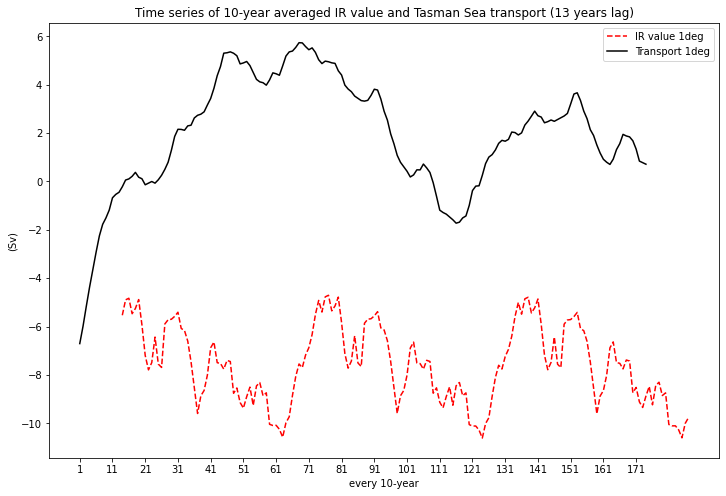

In [9]:
time_series_10_1deg()

In [10]:
def time_series_10_025deg():
    plt.figure(figsize(12,8))
    
    t1 = []
    t2 = []
    t3 = []
    for tt in range (1,175,1):
        t1.append(tt)
        
    for tt in range (1,175,1):
        tt = tt + 12
        t3.append(tt)

    for tt in range (1,175,10):
        t2.append(tt)
        
    plt.plot(t3,x2, 'b--',label = 'IR value 025deg')
    plt.plot(t1,y2, 'k',label ='Transport 025deg')
    plt.legend(loc = 'upper right')
    
                        
    plt.xticks(t2)
    plt.title('Time series of 10-year averaged IR value and Tasman Sea transport (12 years lag)')
    plt.xlabel('every 10-year')
    plt.ylabel('(Sv)')
    # plt.ylim([-15,-4])
    # plt.ylim([-15,6])
    
    savefigure('time series of Tasman Sea transport and IR value_025deg')


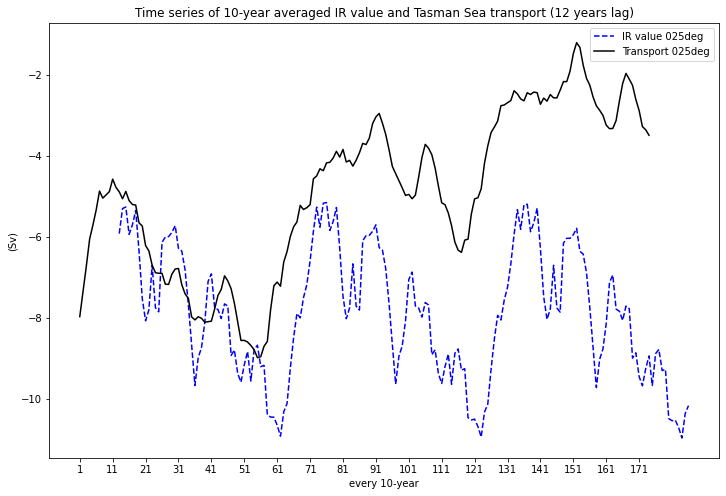

In [11]:
time_series_10_025deg()

In [12]:
def time_series_10_01deg():
    plt.figure(figsize(12,8))
    
    t1 = []
    t2 = []
    t3 = []
    
    for tt in range (1,175,1):
        t1.append(tt)
        
    for tt in range (1,175,1):
        tt = tt + 10
        t3.append(tt)
        
    for tt in range (1,175,10):
        t2.append(tt)
        
    plt.plot(t3,x3, 'g--',label = 'IR value 01deg')
    plt.plot(t1,y3, 'k',label ='Transport 01deg')
    plt.legend(loc = 'upper right')
    
                        
    plt.xticks(t2)
    plt.title('Time series of 10-year averaged IR value and Tasman Sea transport (10 years lag)')
    plt.xlabel('every 10-year')
    plt.ylabel('(Sv)')
    # plt.ylim([-15,-4])
    # plt.ylim([-15,6])
    
    savefigure('time series of Tasman Sea transport and IR value_01deg')


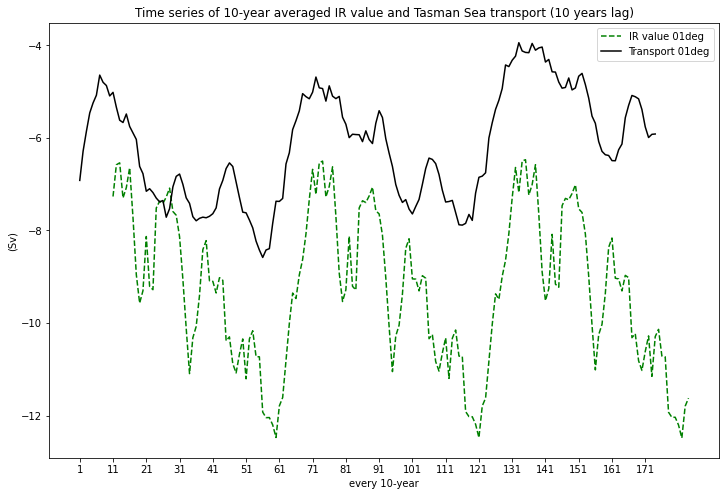

In [13]:
time_series_10_01deg()